
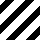
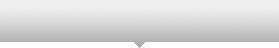
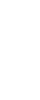
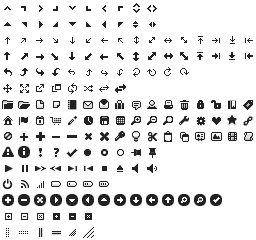
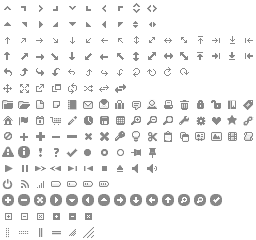
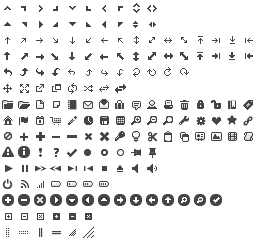
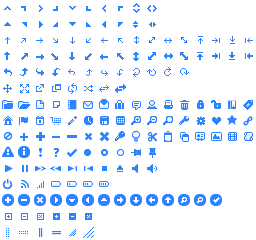
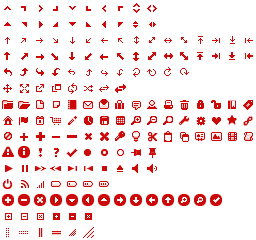
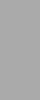
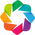
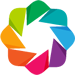
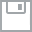
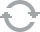
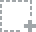
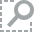
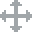
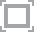
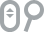

In [22]:
import os
import h5py
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML


import bokeh.plotting as bplt
from bokeh.plotting import figure, output_notebook, show

mpld3.enable_notebook()
output_notebook()

H5_DIR = '/home/nmarais'

# H5_FILES = [
# '1428420293.5.corr2.h5',  # Captured some time week of 30 March
# '1428677883.03.corr2.h5', # Newer firmware, captured 10/04/2015, signal at about -46dB
# '1428678491.86.corr2.h5', # Newer firmware, captured 10/04/2015, signal at about -56dB, 
#                           #     noise attenuator set to -15 dB
# ]

H5_FILES = [fn for fn in (os.listdir(H5_DIR)) if fn.endswith('.h5')]


# H5_FILENAME = '/home/nmarais/project_store/SKA-CBF-tests/1428420293.5.corr2.h5'
# H5_FILENAME = '/home/nmarais/project_store/SKA-CBF-tests/1428677883.03.corr2.h5'
# H5_FILENAME = '/home/nmarais/project_store/SKA-CBF-tests/1428678491.86.corr2.h5'
# H5_FILENAME = '/home/nmarais/1428420293.5.corr2.h5'



In [2]:
H5_FILES


['1431506574.76.corr2.h5']

In [3]:
class AttrDict(dict):
    """
    Based on JSObject : Python Objects that act like Javascript Objects
    based on James Robert blog entry:
    Making Python Objects that act like Javascript Objects
    http://jiaaro.com/making-python-objects-that-act-like-javascrip
    """

    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self



In [4]:
def load_data(h5_filename):
    data = h5py.File(h5_filename, 'r')

    visibilities = data['xeng_raw']
    no_accs = data['n_accs'][0]
    bls_order = data['bls_ordering'][0]
    bls_map = {tuple(pair): index for index, pair in enumerate(bls_order)}
    BW = data['bandwidth'][0]
    f0 = data['center_freq'][0]
    n_chans = data['n_chans'][0]
    delta_f = BW / n_chans
    f_start = f0 - BW/2 # Center freq of the first bin
    chan_freqs = f_start + np.arange(n_chans)*delta_f
    return AttrDict(locals())

In [31]:
data = load_data(os.path.join(H5_DIR, H5_FILES[0]))
data.visibilities.shape
#chan_freqs[-1] + delta_f


data.bls_map[('m000_x', 'm000_y')]

2

In [24]:
def plot_file(filename):
    if not filename:
        return
    h5_name = os.path.join(H5_DIR, filename)
    data = load_data(h5_name)
    plot_acc = 3
    plot_bline = ('m000_x', 'm000_x')
    bls_map = data.bls_map
    plot_vis = data.visibilities[plot_acc]
    plot_bline_vis = plot_vis[:, bls_map[plot_bline], :].astype(np.float64)
    plot_bline_vis_mag = np.linalg.norm(plot_bline_vis, axis=1)
    #plt.plot(chan_freqs, plot_bline_vis_mag)
    #clear_output()
    f = bplt.figure()
    f.line(data.chan_freqs, np.log10(plot_bline_vis_mag))
    bplt.show(f)


In [25]:
i = interact(plot_file,
             filename=widgets.Select(options=H5_FILES),
             )

